In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Get stock indices data from yahoo finance (2000/01/01 to 2022/12/31)
'''US: S&P500
China: SSE Composite Index
Japan: Nikkei 225
Hong Kong: HANG SENG INDEX
India: NIFTY 50
'''
start_date = '1980-01-01'
end_date = '2022-12-31'
stock_indices = ['^GSPC', '000001.SS', '^N225', '^HSI', '^NSEI']
stock_indices_data = yf.download(stock_indices, start=start_date, end=end_date)['Adj Close'].reset_index()
stock_indices_data.describe()


[*********************100%%**********************]  5 of 5 completed


Ticker,Date,000001.SS,^GSPC,^HSI,^N225,^NSEI
count,11186,6179.000000,10843.000000,8891.000000,10579.000000,3747.000000
mean,2001-07-04 01:16:58.916502784,2443.958402,1198.676045,15525.275221,16689.316270,8658.315827
min,1980-01-02 00:00:00,1011.499023,98.220001,1894.900024,6475.930176,2524.199951
25%,1990-10-03 06:00:00,1623.882019,348.979996,9418.750000,10739.679688,5436.350098
50%,2001-07-04 12:00:00,2376.839111,1084.530029,14984.400391,16412.210938,7964.799805
75%,2012-04-03 18:00:00,3111.499512,1470.705017,22641.329102,20725.605469,10859.300293
max,2022-12-30 00:00:00,6092.057129,4796.560059,33154.121094,38915.871094,18812.500000
std,NaN,918.164694,1033.730664,8112.920259,6766.877810,3965.463346


In [4]:
for index in stock_indices:
    print(f'{index} first valid index: {stock_indices_data[index].first_valid_index()}')

^GSPC first valid index: 0
000001.SS first valid index: 4550
^N225 first valid index: 2
^HSI first valid index: 1820
^NSEI first valid index: 7205


In [5]:
print(stock_indices_data.iloc[[0]]['Date'])
print(stock_indices_data.iloc[[4550]]['Date'])
print(stock_indices_data.iloc[[2]]['Date'])
print(stock_indices_data.iloc[[1820]]['Date'])
print(stock_indices_data.iloc[[7205]]['Date'])

0   1980-01-02
Name: Date, dtype: datetime64[ns]
4550   1997-07-02
Name: Date, dtype: datetime64[ns]
2   1980-01-04
Name: Date, dtype: datetime64[ns]
1820   1986-12-31
Name: Date, dtype: datetime64[ns]
7205   2007-09-17
Name: Date, dtype: datetime64[ns]


In [77]:
# calculate the daily log return of stock indices
stock_indices_return = stock_indices_data.copy()
for index in stock_indices:
    stock_indices_return[index] = np.log(stock_indices_return[index] / stock_indices_return[index].shift(1))
# stock_indices_return = stock_indices_return.dropna()

# group the data by year and calculate the annual return
stock_indices_return['Year'] = stock_indices_return['Date'].dt.year
stock_indices_annual_return = pd.DataFrame()
for index in stock_indices:
    stock_indices_annual_return[index] = stock_indices_return.groupby('Year')[index].sum()
stock_indices_annual_return = stock_indices_annual_return.reset_index()
stock_indices_annual_return = stock_indices_annual_return[['Year', '^GSPC', '000001.SS', '^N225', '^HSI', '^NSEI']]

# create new column to store the direction of annual return
for index in stock_indices:
    stock_indices_annual_return[index + '_dir'] = stock_indices_annual_return[index].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

stock_indices_annual_return

,Year,^GSPC,000001.SS,^N225,^HSI,^NSEI,^GSPC_dir,000001.SS_dir,^N225_dir,^HSI_dir,^NSEI_dir
0,1980,0.225864,0.000000,0.078205,0.000000,0.000000,1,0,1,0,0
1,1981,-0.104004,0.000000,0.101944,0.000000,0.000000,-1,0,1,0,0
2,1982,0.133431,0.000000,0.014102,0.000000,0.000000,1,0,1,0,0
3,1983,0.172865,0.000000,0.199617,0.000000,0.000000,1,0,1,0,0
4,1984,0.041748,0.000000,0.137549,0.000000,0.000000,1,0,1,0,0
5,1985,0.236402,0.000000,0.091411,0.000000,0.000000,1,0,1,0,0
6,1986,0.156909,0.000000,0.356901,0.000000,0.000000,1,0,1,0,0
7,1987,0.031892,0.000000,0.089601,0.329426,0.000000,1,0,1,1,0
8,1988,0.076810,0.000000,0.328290,0.124826,0.000000,1,0,1,1,0
9,1989,0.240718,0.000000,0.259039,-0.009375,0.000000,1,0,1,-1,0


In [7]:
df_cp = stock_indices_data.copy()
df_cp['Year'] = df_cp['Date'].dt.year
stock_indices_mean = pd.DataFrame()
for index in stock_indices:
    stock_indices_mean[index] = df_cp.groupby('Year')[index].mean()
stock_indices_mean = stock_indices_mean.reset_index()
stock_indices_mean = stock_indices_mean[['Year', '^GSPC', '000001.SS', '^N225', '^HSI', '^NSEI']]
stock_indices_mean

,Year,^GSPC,000001.SS,^N225,^HSI,^NSEI
0,1980,118.710118,NaN,6868.286545,NaN,NaN
1,1981,128.037905,NaN,7516.848707,NaN,NaN
2,1982,119.705732,NaN,7387.732454,NaN,NaN
3,1983,160.473122,NaN,8806.450587,NaN,NaN
4,1984,160.463557,NaN,10564.541401,NaN,NaN
5,1985,186.828174,NaN,12561.648497,NaN,NaN
6,1986,236.390474,NaN,16425.400434,2568.300049,NaN
7,1987,286.998024,NaN,23232.155815,2908.023981,NaN
8,1988,265.880158,NaN,27033.587248,2555.631046,NaN
9,1989,323.051429,NaN,34068.409014,2792.818288,NaN


In [8]:
gdp_data = pd.read_csv('WEOOct2023all.csv')

In [9]:
gdp_data[gdp_data['country'] == 'United States']['Gross domestic product, current prices.1']

9114     2857.33
9115     3207.03
9116     3343.80
9117     3634.03
9118     4037.65
9119     4339.00
9120     4579.63
9121     4855.25
9122     5236.43
9123     5641.60
9124     5963.13
9125     6158.13
9126     6520.33
9127     6858.55
9128     7287.25
9129     7639.75
9130     8073.13
9131     8577.55
9132     9062.83
9133     9631.18
9134    10250.95
9135    10581.93
9136    10929.10
9137    11456.45
9138    12217.18
9139    13039.20
9140    13815.60
9141    14474.25
9142    14769.85
9143    14478.05
9144    15048.98
9145    15599.73
9146    16253.95
9147    16843.23
9148    17550.68
9149    18206.03
9150    18695.10
9151    19477.35
9152    20533.08
9153    21380.95
9154    21060.45
9155    23315.08
9156    25462.73
9157    26949.64
9158    27966.55
9159    29048.89
9160    30223.88
9161    31428.87
9162    32690.37
Name: Gross domestic product, current prices.1, dtype: float64

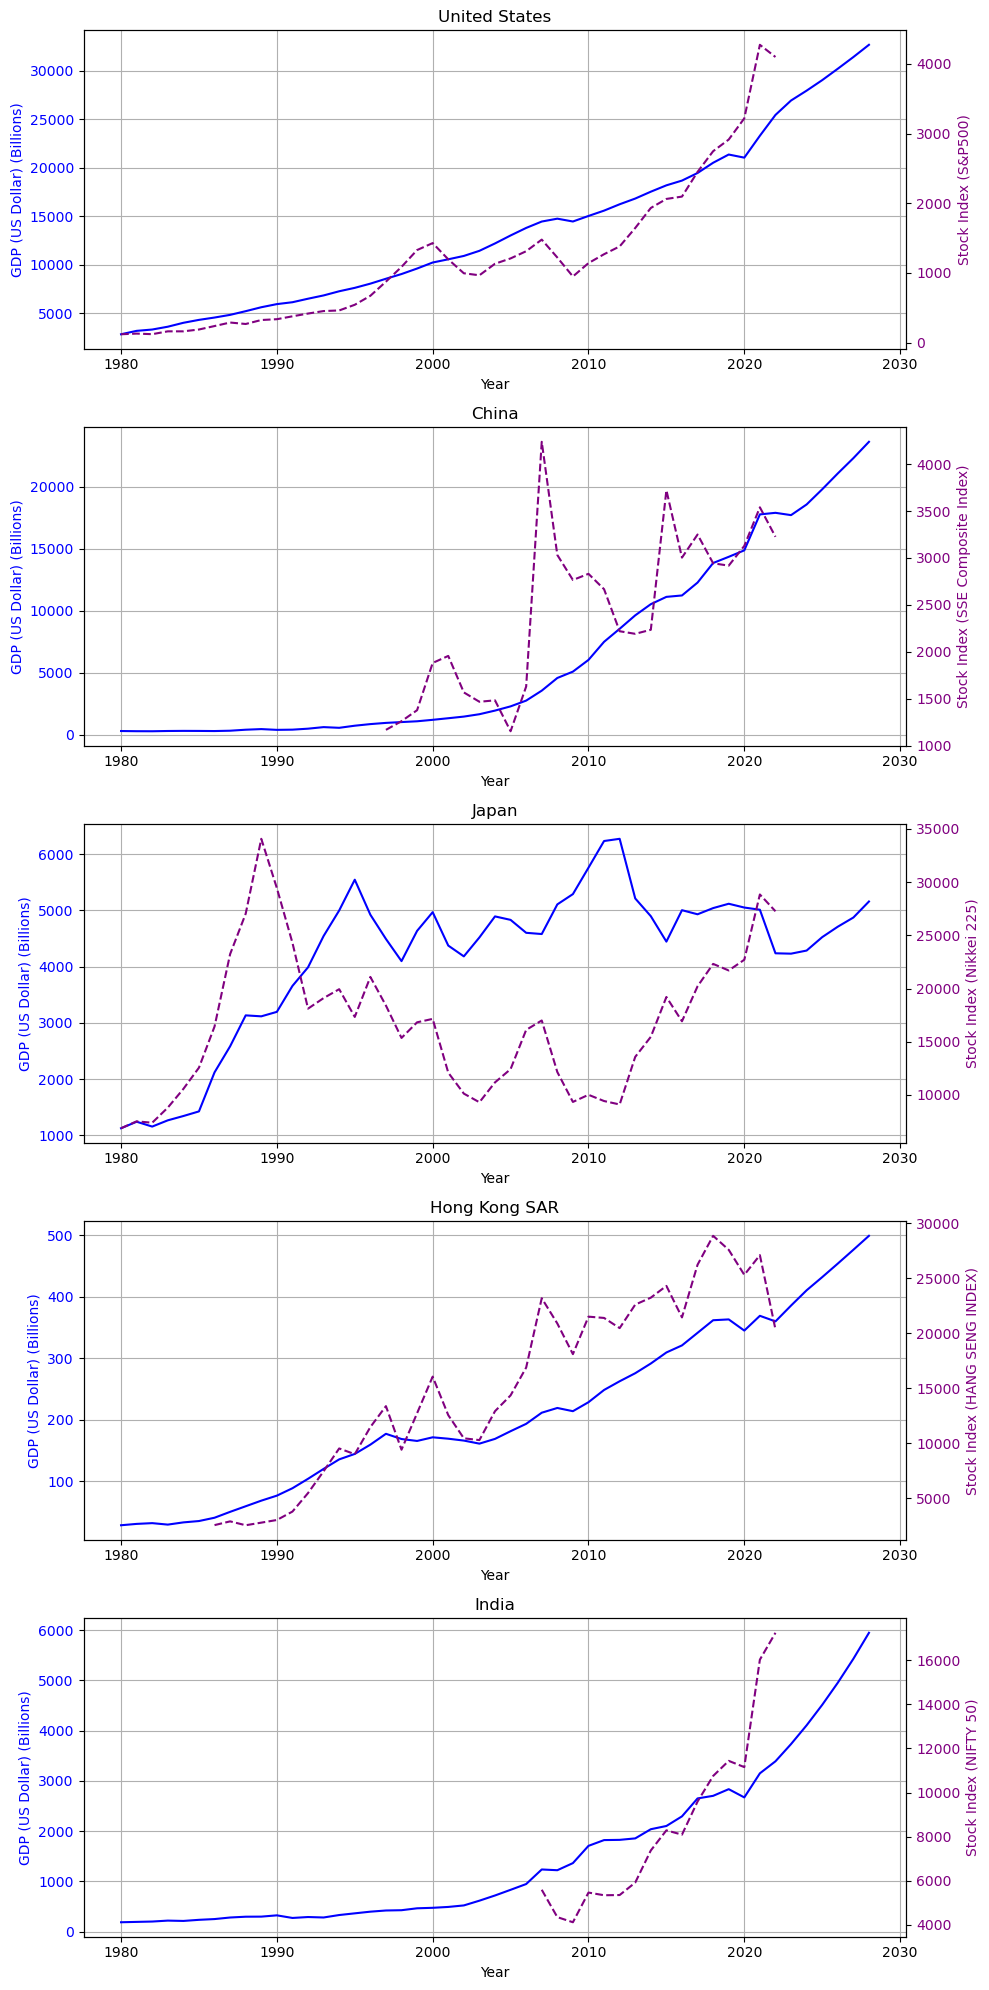

In [330]:
# plot GDP for United States, China, Japan, Hong Kong, India
''''Gross domestic product, current prices.1' is the GDP column in gdp_data'''

countries = ['United States', 'China', 'Japan', 'Hong Kong SAR', 'India']
stock_indices_name = ['S&P500', 'SSE Composite Index', 'Nikkei 225', 'HANG SENG INDEX', 'NIFTY 50']

figure, axis = plt.subplots(5, 1)
figure.set_figheight(20)
figure.set_figwidth(10)
for i in range(5):
    axis[i].plot(gdp_data[gdp_data['country'] == countries[i]]['year'], gdp_data[gdp_data['country'] == countries[i]]['Gross domestic product, current prices.1'], color='blue')
    axis[i].tick_params(axis='y', labelcolor='blue')

    ax2 = axis[i].twinx()
    # ax2.plot(stock_indices_annual_return['Year'], (np.exp(stock_indices_annual_return[stock_indices[i]]) - 1) * 100, linestyle='--', color='purple')
    ax2.plot(stock_indices_mean['Year'], stock_indices_mean[stock_indices[i]], linestyle='--', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')
    # ax2.set_ylabel('Stock Annual Return (%)', color='purple')
    ax2.set_ylabel('Stock Index (' + stock_indices_name[i] + ")", color='purple')

    axis[i].set_title(countries[i])
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('GDP (US Dollar) (Billions)', color='blue')
    axis[i].grid(True)
plt.tight_layout()

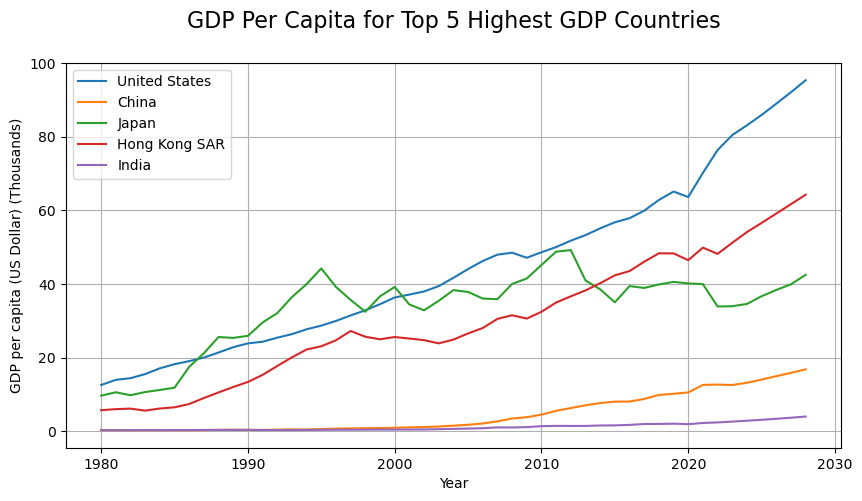

In [351]:
# plot GDP per capita for United States, China, Japan, Hong Kong, India
'''Gross domestic product per capita, current prices.1' is the GDP per capita column in gdp_data'''
figure, axis = plt.subplots()
figure.set_figheight(5)
figure.set_figwidth(10)

for i in range(5):
    axis.plot(gdp_data[gdp_data['country'] == countries[i]]['year'], gdp_data[gdp_data['country'] == countries[i]]['Gross domestic product per capita, current prices.1']/1000)
axis.set_title('GDP Per Capita for Top 5 Highest GDP Countries\n', fontsize=16)
axis.set_xlabel('Year')
axis.set_ylabel('GDP per capita (US Dollar) (Thousands)')
axis.grid(True)
axis.legend(countries)

In [76]:
arrays = []
col_index_name_1 = []
col_index_name_2 = []
for i in ['GDP', 'GDP per capita', 'GDP_dir', 'GDP per capita_dir']:
    for country in countries:
        col_index_name_1.append(i)
        col_index_name_2.append(country)
arrays.append(col_index_name_1)
arrays.append(col_index_name_2)
tuples = list(zip(*arrays))
col_index = pd.MultiIndex.from_tuples(tuples)

# calculate the log growth rate of GDP
gdp_growth_rate = pd.DataFrame(columns=col_index)
gdp_growth_rate['Year'] = gdp_data[gdp_data['country'] == countries[0]]['year']
gdp_growth_rate = gdp_growth_rate.reset_index(drop=True)
for country in countries:
    df_tmp = pd.DataFrame()
    df_tmp['GDP'] = np.log(gdp_data[gdp_data['country'] == country]['Gross domestic product, current prices.1'] / gdp_data[gdp_data['country'] == country]['Gross domestic product, current prices.1'].shift(1))
    df_tmp['GDP per capita'] = np.log(gdp_data[gdp_data['country'] == country]['Gross domestic product per capita, current prices.1'] / gdp_data[gdp_data['country'] == country]['Gross domestic product per capita, current prices.1'].shift(1))
    df_tmp.reset_index(drop=True, inplace=True)
    gdp_growth_rate['GDP', country] = df_tmp['GDP']
    gdp_growth_rate['GDP per capita', country] = df_tmp['GDP per capita']
    gdp_growth_rate['GDP_dir', country] = np.where(gdp_growth_rate['GDP', country] > 0, 1, np.where(gdp_growth_rate['GDP', country] < 0, -1, 0))
    gdp_growth_rate['GDP per capita_dir', country] = np.where(gdp_growth_rate['GDP per capita', country] > 0, 1, np.where(gdp_growth_rate['GDP per capita', country] < 0, -1, 0))
gdp_growth_rate

GDP                                             GDP per capita  \
   United States     China     Japan Hong Kong SAR     India  United States   
0            NaN       NaN       NaN           NaN       NaN            NaN   
1       0.115458 -0.048361  0.097823      0.073234  0.036779       0.105431   
2       0.041763 -0.014296 -0.071814      0.039029  0.035007       0.032188   
3       0.083234  0.070626  0.091581     -0.076696  0.087050       0.074148   
4       0.105321  0.028411  0.058613      0.113781 -0.029677       0.096563   
5       0.071981 -0.013124  0.059277      0.063277  0.097444       0.063099   
6       0.053974 -0.030157  0.396186      0.140273  0.061740       0.044883   
7       0.058442  0.085340  0.197465      0.208982  0.115689       0.049513   
8       0.075579  0.220707  0.192897      0.165060  0.054505       0.066488   
9       0.074528  0.114371 -0.005474      0.141592  0.005289       0.065109   
10      0.055428 -0.144359  0.025182      0.111825  0.080873       0.044322   
11      0.032178  0.041051  0.134664      0.145304 -0.172564       0.018891   
12      0.057152  0.174826  0.086634      0.158816  0.064870       0.043880   
13      0.050571  0.226791  0.130605      0.143435 -0.031409       0.037536   
14      0.060630 -0.094628  0.095221      0.120834  0.158527       0.048487   
15      0.047239  0.263465  0.103802      0.063059  0.096087       0.035409   
16      0.055176  0.163068 -0.119002      0.099079  0.086671       0.043525   
17      0.060607  0.107362 -0.091599      0.104710  0.056877       0.048656   
18      0.055033  0.066799 -0.091811     -0.049061  0.013095       0.043371   
19      0.060824  0.060780  0.123261     -0.018674  0.085131       0.049396   
20      0.062365  0.102257  0.069242      0.035033  0.020654       0.051319   
21      0.031777  0.101000 -0.127250     -0.013266  0.035742       0.021486   
22      0.032281  0.094502 -0.044847     -0.018141  0.058994       0.022502   
23      0.047124  0.122563  0.077422     -0.030310  0.165633       0.037744   
24      0.064290  0.162563  0.079420      0.046702  0.154388       0.055199   
25      0.065117  0.161013 -0.012683      0.071163  0.145038       0.055868   
26      0.057838  0.184548 -0.048734      0.063791  0.129039       0.048376   
27      0.046573  0.255432 -0.004773      0.089262  0.266286       0.036676   
28      0.020217  0.252564  0.108905      0.035728 -0.011857       0.010936   
29     -0.019954  0.105974  0.035172     -0.024145  0.109220      -0.028632   
30      0.038677  0.170303  0.085054      0.065944  0.224167       0.031017   
31      0.035943  0.216482  0.079106      0.083355  0.064919       0.028844   
32      0.041082  0.130848  0.006271      0.055243  0.002515       0.033983   
33      0.035613  0.119645 -0.185126      0.048560  0.015786       0.028746   
34      0.041144  0.089325 -0.062404      0.055600  0.093712       0.033937   
35      0.036660  0.054480 -0.096859      0.059687  0.031122       0.029447   
36      0.026509  0.010151  0.118410      0.036415  0.087000       0.019383   
37      0.040991  0.088464 -0.014664      0.061672  0.144469       0.034641   
38      0.052785  0.120917  0.022071      0.058224  0.019222       0.047439   
39      0.040463  0.035401  0.015183      0.003709  0.047921       0.035815   
40     -0.015103  0.035751 -0.013241     -0.051236 -0.059580      -0.023319   
41      0.101703  0.178065 -0.007714      0.067177  0.164823       0.098518   
42      0.088115  0.007127 -0.167829     -0.024893  0.073238       0.084465   
43      0.056754 -0.010421 -0.001575      0.069004  0.096265       0.051929   
44      0.037039  0.047394  0.012993      0.062365  0.095295       0.032426   
45      0.037971  0.063748  0.054138      0.050720  0.094409       0.033317   
46      0.039652  0.062610  0.040182      0.049672  0.093008       0.034998   
47      0.039095  0.056818  0.034025      0.048228  0.091744       0.034440   
48      0.039354  0.057437  0.056793      0.046575  0.090988   

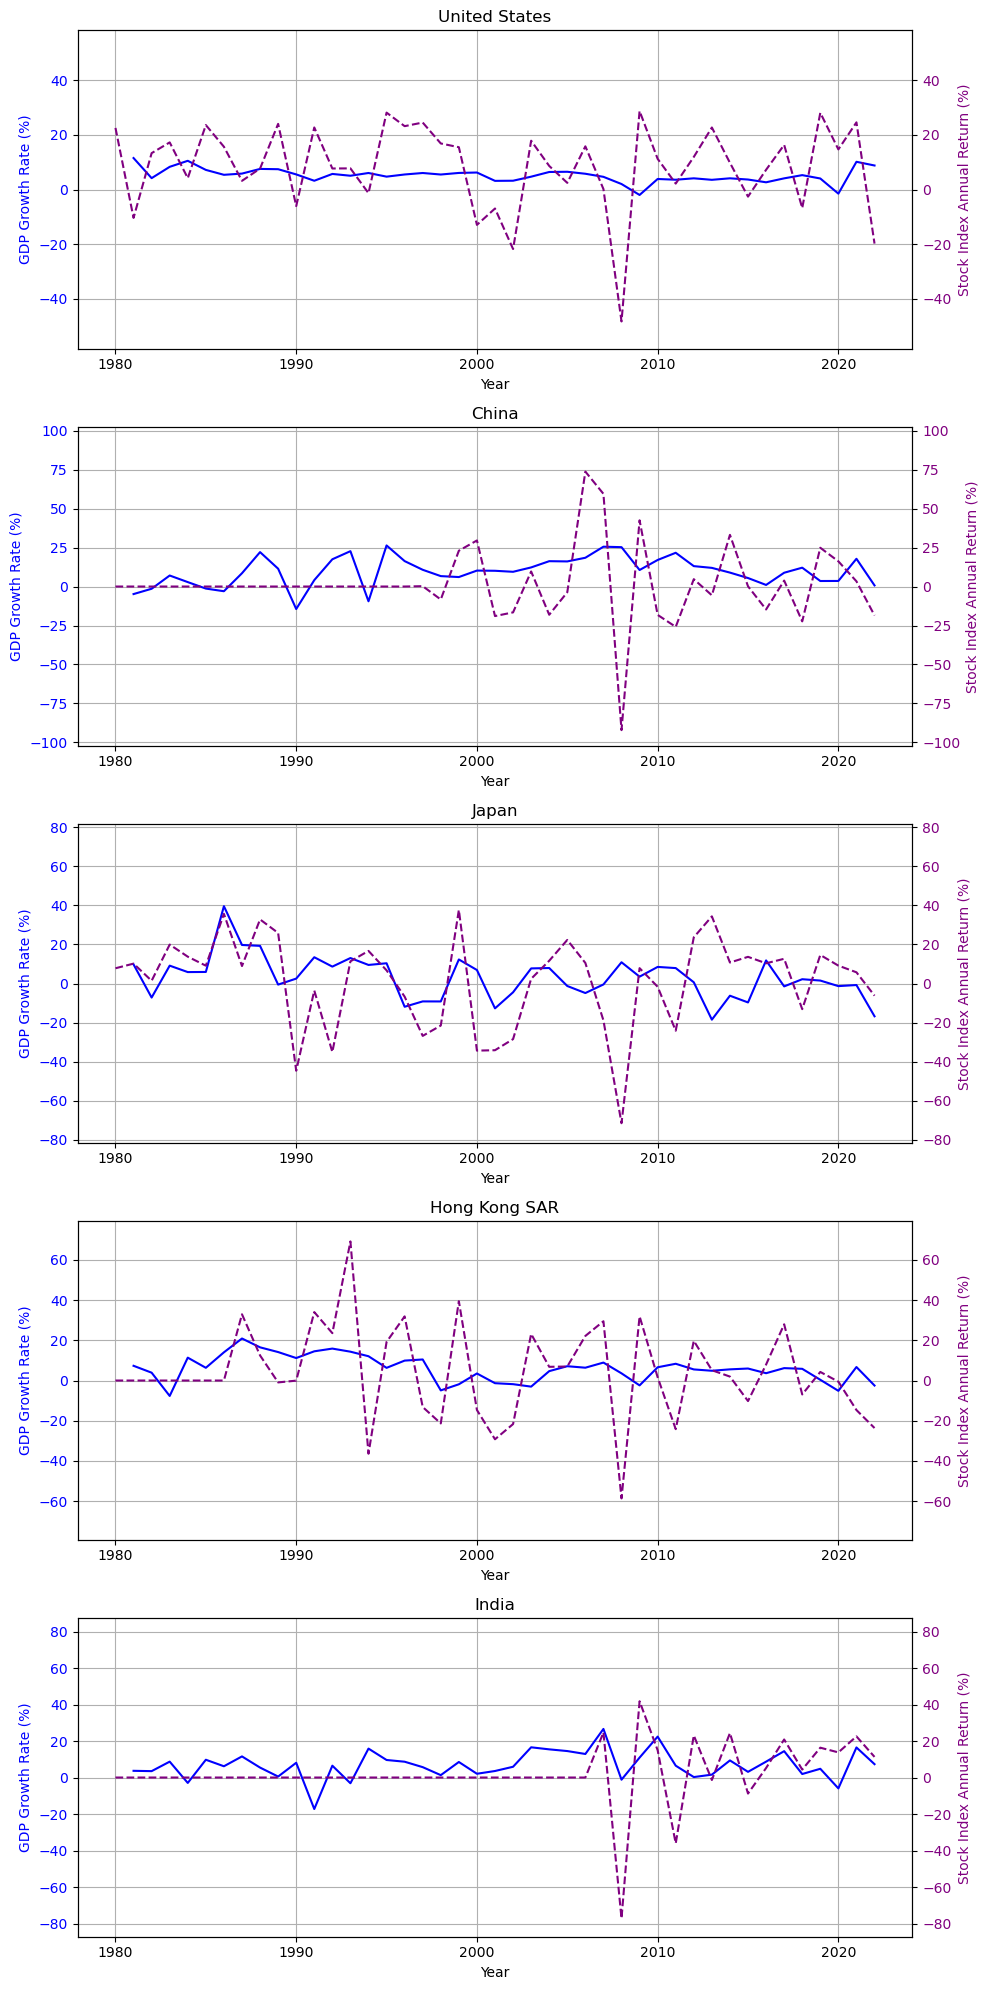

In [338]:
# plotting the GDP growth rate, GDP per capita growth rate, and stock annual return for United States, China, Japan, Hong Kong, India
figure, axis = plt.subplots(5, 1)
figure.set_figheight(20)
figure.set_figwidth(10)
for i in range(5):
    axis[i].plot(gdp_growth_rate[gdp_growth_rate['Year'] <= 2022]['Year'], gdp_growth_rate[gdp_growth_rate['Year'] <= 2022]['GDP', countries[i]] * 100, color='blue')
    axis[i].tick_params(axis='y', labelcolor='blue')
    # axis[i].plot(gdp_growth_rate['Year'], gdp_growth_rate['GDP per capita', countries[i]] * 100, color='green')
    # axis[i].tick_params(axis='y', labelcolor='blue')

    ax2 = axis[i].twinx()
    ax2.plot(stock_indices_annual_return['Year'], stock_indices_annual_return[stock_indices[i]] * 100, linestyle='--', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')
    ax2.set_ylabel('Stock Index Annual Return (%)', color='purple')

    # share y axis
    max_y = (stock_indices_annual_return[stock_indices[i]] * 100).abs().max() + 10
    min_y = (stock_indices_annual_return[stock_indices[i]] * 100).abs().max()*(-1) - 10
    axis[i].set_ylim(min_y, max_y)
    ax2.set_ylim(min_y, max_y)

    axis[i].set_title(countries[i])
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('GDP Growth Rate (%)', color='blue')
    axis[i].grid(True)
plt.tight_layout()

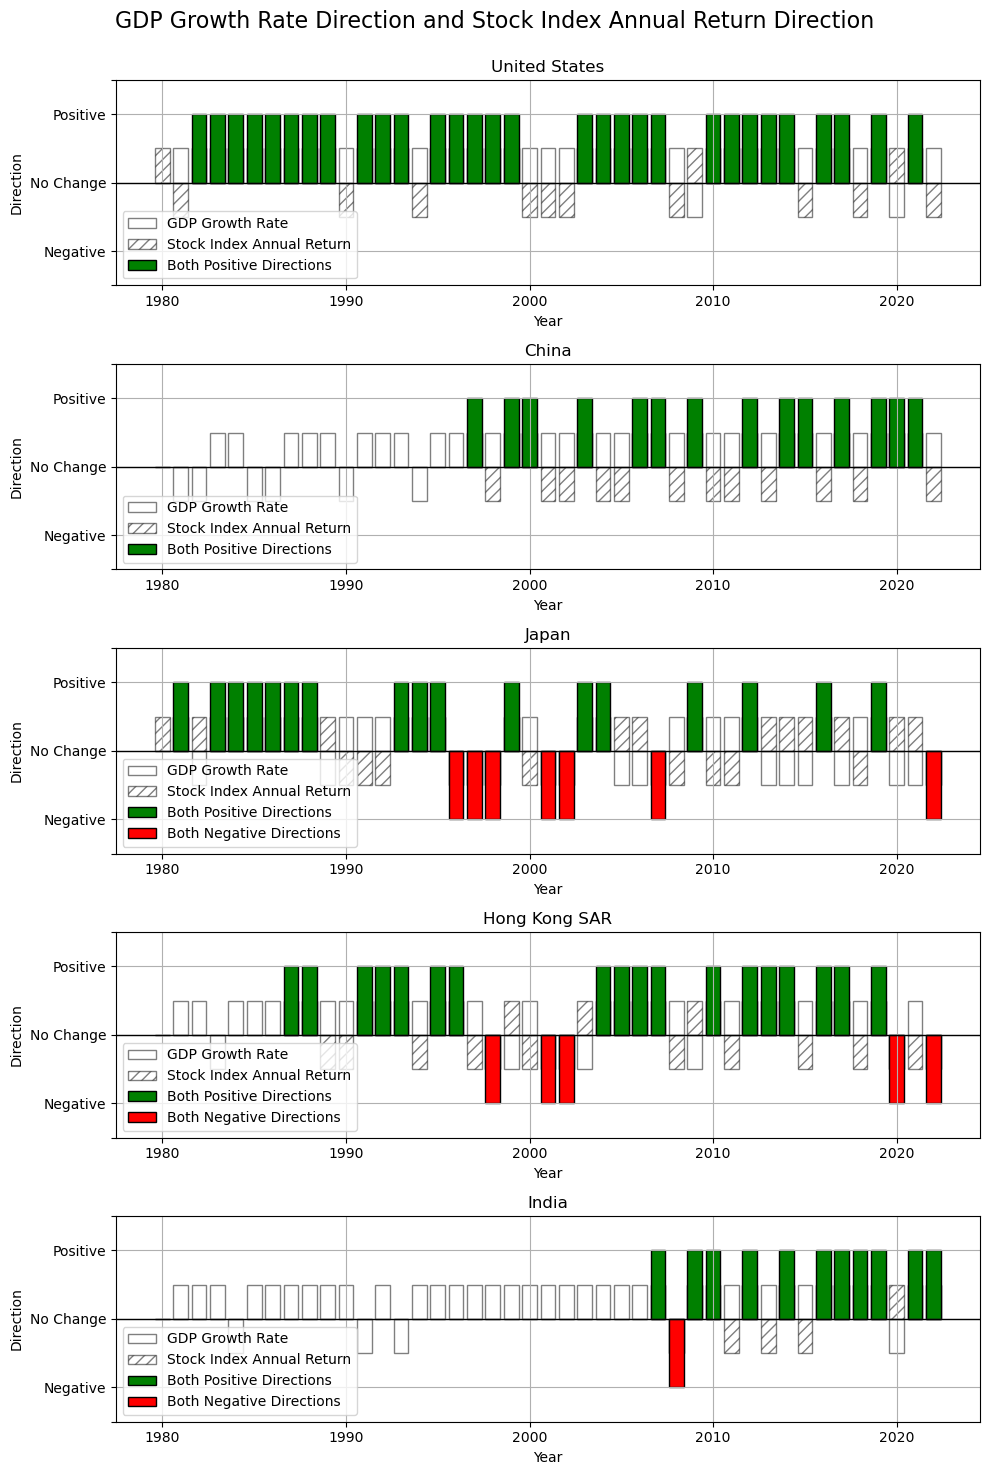

In [344]:
# plot four bar chart for GDP growth rate direction and stock annual return direction
# right upper corner: GDP growth rate direction and stock annual return direction are both positive
# right lower corner: GDP growth rate direction is positive while stock annual return direction is negative
# left upper corner: GDP growth rate direction is negative while stock annual return direction is positive
# left lower corner: GDP growth rate direction and stock annual return direction are both negative
figure, axis = plt.subplots(5, 1)
figure.set_figheight(15)
figure.set_figwidth(10)
for i in range(5):
    axis[i].bar(gdp_growth_rate[gdp_growth_rate['Year'] <= 2022]['Year'], gdp_growth_rate[gdp_growth_rate['Year'] <= 2022]['GDP_dir', countries[i]], color='blue', alpha=0.5, fill=False)
    axis[i].bar(stock_indices_annual_return['Year'], stock_indices_annual_return[stock_indices[i] + '_dir'], color='purple', alpha=0.5, hatch="///", fill=False)
    
    sum_dir = pd.DataFrame()
    sum_dir['Year'] = stock_indices_annual_return['Year']
    sum_dir['Value'] = stock_indices_annual_return[stock_indices[i] + '_dir'] + gdp_growth_rate[gdp_growth_rate['Year'] <= 2022]['GDP_dir', countries[i]]
    sum_dir.loc[(sum_dir['Value'] == 1) | (sum_dir['Value'] == -1), ['Value']] = 0
    axis[i].bar(sum_dir[sum_dir['Value'] == 2]['Year'], sum_dir[sum_dir['Value'] == 2]['Value'], color='green', edgecolor='black')
    axis[i].bar(sum_dir[sum_dir['Value'] == -2]['Year'], sum_dir[sum_dir['Value'] == -2]['Value'], color='red', edgecolor='black')

    if (sum_dir[sum_dir['Value'] == -2]['Value'].count() > 0):
        axis[i].legend(['GDP Growth Rate', 'Stock Index Annual Return', 'Both Positive Directions', 'Both Negative Directions'], loc='lower left')
    else:
        axis[i].legend(['GDP Growth Rate', 'Stock Index Annual Return', 'Both Positive Directions'], loc='lower left')
    # emphasize the zero line
    axis[i].axhline(0, color='black', linewidth=1)
    # change y-axis ticker from -1, 0, 1 to 'Negative', 'No Change', 'Positive'
    axis[i].set_yticks([-3, -2, 0, 2, 3])
    axis[i].set_yticklabels(['', 'Negative', 'No Change', 'Positive', ''])
    axis[i].set_title(countries[i])
    axis[i].set_xlabel('Year')
    axis[i].set_ylabel('Direction')
    axis[i].grid(True)
# add title for the whole figure
figure.suptitle('GDP Growth Rate Direction and Stock Index Annual Return Direction\n', fontsize=16)
plt.tight_layout()


In [90]:
# create a new dataframe with columns: Year, Country, GDP Growth Rate Direction, Stock Annual Return Direction
four_quadrant_df = pd.DataFrame(columns=['Year', 'Country', 'GDP Growth Rate Direction', 'Stock Annual Return Direction'])
for country in countries:
    df_tmp = pd.DataFrame()
    df_tmp['Year'] = gdp_growth_rate[gdp_growth_rate['Year'] <= 2022]['Year']
    df_tmp['Country'] = country
    df_tmp['GDP Growth Rate Direction'] = gdp_growth_rate[gdp_growth_rate['Year'] <= 2022]['GDP_dir', country]
    df_tmp['Stock Annual Return Direction'] = stock_indices_annual_return[stock_indices[0] + '_dir']
    four_quadrant_df = pd.concat([four_quadrant_df, df_tmp])
four_quadrant_df.reset_index(drop=True, inplace=True)
four_quadrant_df

,Year,Country,GDP Growth Rate Direction,Stock Annual Return Direction
0,1980,United States,0,1
1,1981,United States,1,-1
2,1982,United States,1,1
3,1983,United States,1,1
4,1984,United States,1,1
...,...,...,...,...
210,2018,India,1,-1
211,2019,India,1,1
212,2020,India,-1,1
213,2021,India,1,1


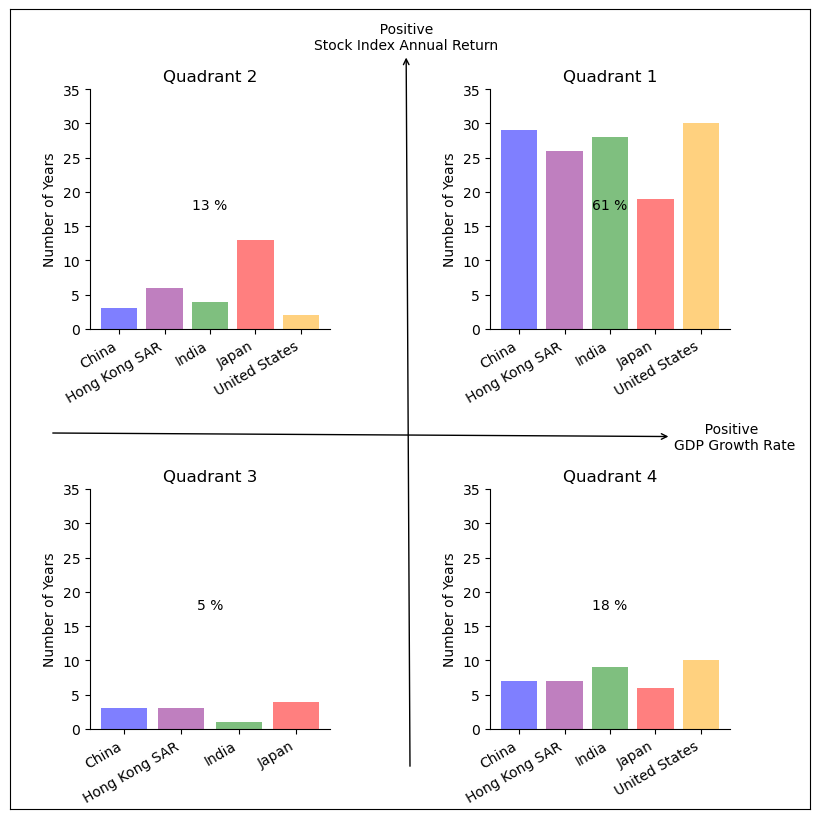

In [349]:
four_quadrant = [[-1, 1], [1, 1], [-1, -1], [1, -1]]
four_quadrant_title = ['2', '1', '3', '4']
color_list = ['blue', 'purple', 'green', 'red', 'orange']
total_num = four_quadrant_df[(four_quadrant_df["GDP Growth Rate Direction"] != 0) | (four_quadrant_df["Stock Annual Return Direction"] != 0)].shape[0]

# figure, axis = plt.subplots(2, 2)
# figure.set_figheight(5)
# figure.set_figwidth(5)
plt.figure(figsize=(8, 8))
ax0 = plt.axes([0, 0, 1, 1])
ax0.set_xticks([])
ax0.set_yticks([])

for i in range(2):
    for j in range(2):
        ax = plt.axes([0.1 + 0.5 * j, 0.1 + 0.5 * (1-i), 0.3, 0.3])
        ax.bar(four_quadrant_df[(four_quadrant_df['GDP Growth Rate Direction'] == four_quadrant[2*i + j][0]) & (four_quadrant_df['Stock Annual Return Direction'] == four_quadrant[2*i + j][1])].groupby(['Country']).size().index, 
                       four_quadrant_df[(four_quadrant_df['GDP Growth Rate Direction'] == four_quadrant[2*i + j][0]) & (four_quadrant_df['Stock Annual Return Direction'] == four_quadrant[2*i + j][1])].groupby(['Country']).size(), color=color_list, alpha=0.5)
        ax.set_title(f'Quadrant {four_quadrant_title[2*i + j]}')
        # print percentage for each quadrant
        quadrant_num = four_quadrant_df[(four_quadrant_df["GDP Growth Rate Direction"] == four_quadrant[2*i + j][0]) & (four_quadrant_df["Stock Annual Return Direction"] == four_quadrant[2*i + j][1])].shape[0]
        ax.text(0.5, 0.5, f'{ int(quadrant_num/total_num * 100)} %', horizontalalignment='center', transform=ax.transAxes)
        # hide x ticks label
        # ax.set_xticklabels([])
        # rotate x ticks label
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
        ax.set_ylim(0, 35)
        ax.set_ylabel('Number of Years')
        # hide bar chart boarder
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # axis[i, j].grid(True)
# draw horizontal arrow lines between upper and lower bar chart
ax0.annotate("               Positive\nStock Index Annual Return", xy=(0.5, 0.05), xytext=(0.38, 0.95), arrowprops=dict(arrowstyle="<-", color='black'), color='black')
# ax0.plot([0.5, 0.5], [0, 1], color='purple', lw=1)
ax0.annotate("       Positive\nGDP Growth Rate", xy=(0.05, 0.47), xytext=(0.83, 0.45), arrowprops=dict(arrowstyle="<-", color='black'), color='black')
# ax0.plot([0, 1], [0.5, 0.5], color='blue', lw=1)
# add title and subtitle
# plt.text(4, 50, 'Positive GDP Growth Rate', horizontalalignment='center', fontsize=10, color='blue')
# plt.text(-2.5, 102, 'Positive Stock Index Annual Return', horizontalalignment='center', fontsize=10, color='purple')
# plt.text(-8.5, 50, 'Negative GDP Growth Rate', horizontalalignment='center', fontsize=10, color='blue')
# plt.text(-2.5, -10, 'Negative Stock Index Annual Return', horizontalalignment='center', fontsize=10, color='purple')
plt.tight_layout()

In [353]:
# create a new dataframe with columns: Year, Country, indicator, value
violin_df = pd.DataFrame(columns=['Year', 'Country', 'Indicator', 'Value'])
for idx in range(len(countries)):
    df_tmp = pd.DataFrame()
    df_tmp['Year'] = gdp_growth_rate[gdp_growth_rate['Year'] <= 2022]['Year']
    df_tmp['Country'] = countries[idx]
    df_tmp['Indicator'] = 'GDP Growth Rate'
    df_tmp['Value'] = gdp_growth_rate[gdp_growth_rate['Year'] <= 2022]['GDP', countries[idx]] * 100
    violin_df = pd.concat([violin_df, df_tmp])
    df_tmp = pd.DataFrame()
    df_tmp['Year'] = stock_indices_annual_return['Year']
    df_tmp['Country'] = countries[idx]
    df_tmp['Indicator'] = 'Stock Index Annual Return'
    df_tmp['Value'] = stock_indices_annual_return[stock_indices[idx]] * 100
    violin_df = pd.concat([violin_df, df_tmp])
violin_df.reset_index(drop=True, inplace=True)
violin_df.groupby(['Country', 'Indicator']).size()

Country        Indicator                
China          GDP Growth Rate              43
               Stock Index Annual Return    43
Hong Kong SAR  GDP Growth Rate              43
               Stock Index Annual Return    43
India          GDP Growth Rate              43
               Stock Index Annual Return    43
Japan          GDP Growth Rate              43
               Stock Index Annual Return    43
United States  GDP Growth Rate              43
               Stock Index Annual Return    43
dtype: int64

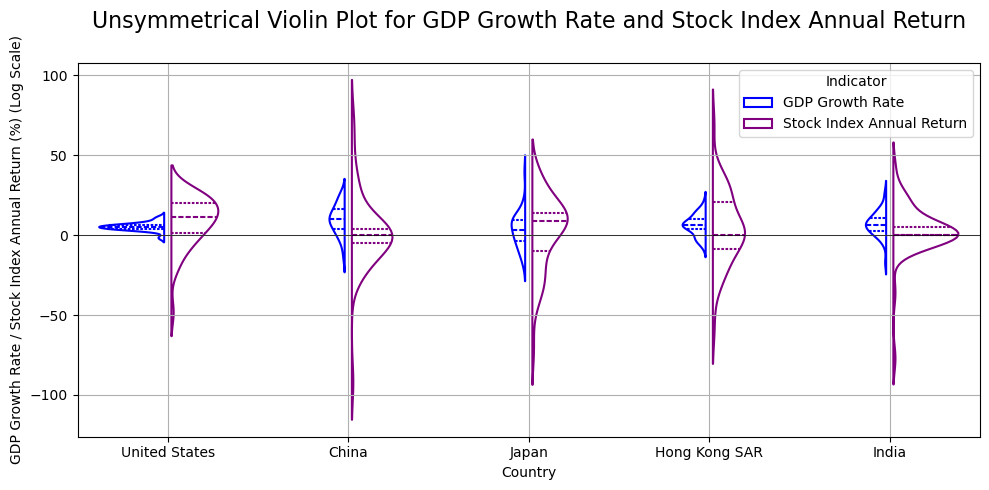

In [357]:
# plot the unsymmetrical violin plot for GDP growth rate and stock annual return of United States, China, Japan, Hong Kong, India
plt.figure(figsize=(10, 5))
my_pal = {ind: "blue" if ind == "GDP Growth Rate" else "purple" for ind in violin_df["Indicator"].unique()}
sns.violinplot(data=violin_df, x="Country", y="Value", hue="Indicator", split=True, gap=.1, inner="quart", palette=my_pal, fill=False)
# emphasize the zero line
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Unsymmetrical Violin Plot for GDP Growth Rate and Stock Index Annual Return\n', fontsize=16)
plt.xlabel('Country')
plt.ylabel('GDP Growth Rate / Stock Index Annual Return (%) (Log Scale)')
plt.grid(True)
plt.legend(title='Indicator')
plt.tight_layout()